In [260]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

import warnings
warnings.filterwarnings('ignore')

# Any results you write to the current directory are saved as output.

['heart.csv']


In [261]:
df = pd.read_csv('../input/heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [262]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


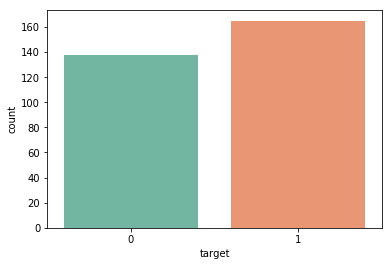

In [264]:
sns.set_palette('Set2')
sns.countplot(x='target',data=df)

Male : 207
Female : 96


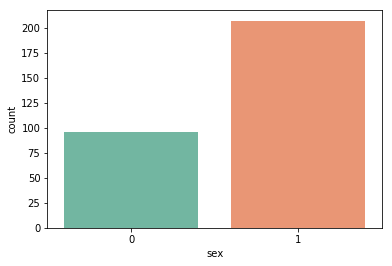

In [265]:
print('Male :',df.sex.value_counts().tolist()[0])
print('Female :',df.sex.value_counts().tolist()[1])
sns.countplot(x='sex',data=df)

In [266]:
df.shape

(303, 14)

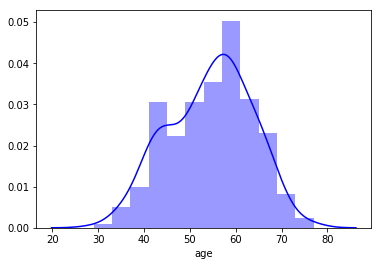

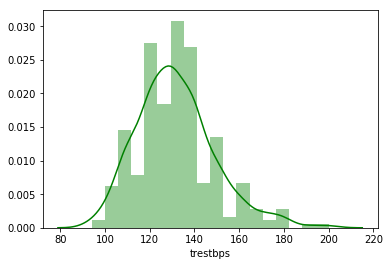

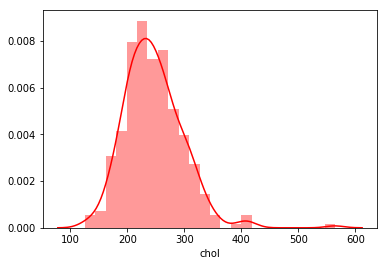

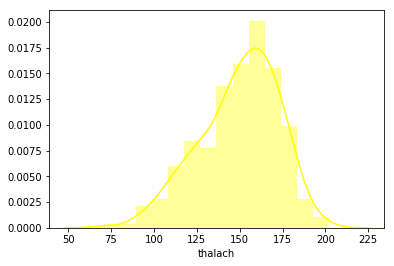

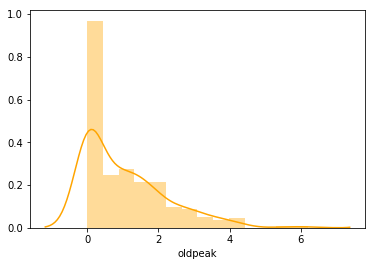

In [267]:
continuous = ['age','trestbps','chol','thalach','oldpeak']
color = ['blue','green','red','yellow','orange']
for i,j in zip(continuous,color):
    sns.distplot(df[i],color=j)
    plt.show()

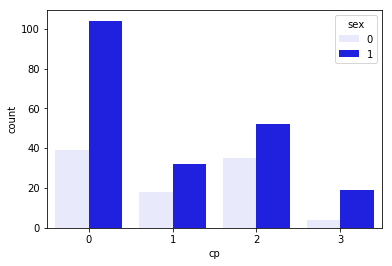

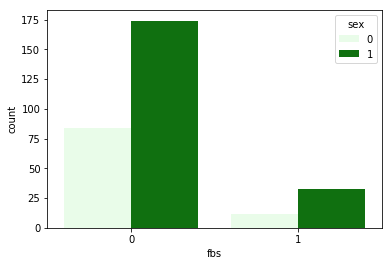

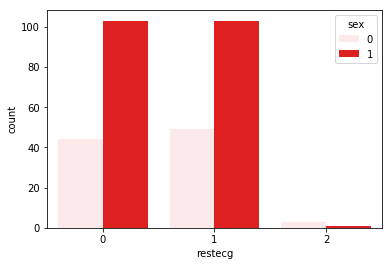

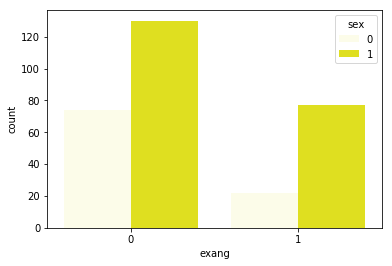

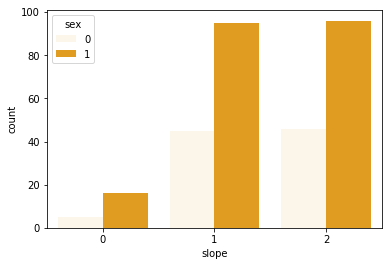

In [268]:
categorical = [cat for cat in df.columns.tolist() if cat not in continuous]
categorical.remove('sex')
for i,j in zip(categorical,color):
    sns.countplot(x=i,data=df,color=j,hue=df.sex)
    plt.show()

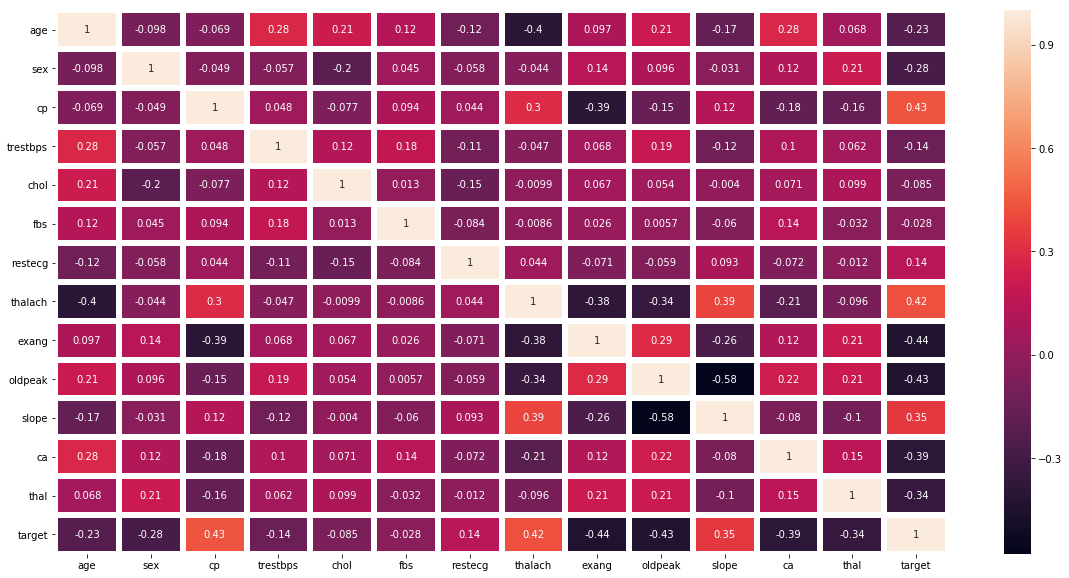

In [269]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,linewidths=5)

In [270]:
categorical.remove('target')
for i in categorical:
    df[i] = df[i].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null object
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null object
restecg     303 non-null object
thalach     303 non-null int64
exang       303 non-null object
oldpeak     303 non-null float64
slope       303 non-null object
ca          303 non-null object
thal        303 non-null object
target      303 non-null int64
dtypes: float64(1), int64(6), object(7)
memory usage: 33.2+ KB


In [271]:
y = df.iloc[:,13].values
df.drop(labels='target',axis=1,inplace=True)
df = pd.get_dummies(df,drop_first=True)
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


In [272]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
x = df.iloc[:,:-1].values
xtr, xtst, ytr, ytst = train_test_split(x,y,test_size=0.20,random_state=0)
print('X train : {}\tY train :{}\nX test : {}\tY test : {}'.format(xtr.shape,ytr.shape,xtst.shape,ytst.shape))

X train : (242, 21)	Y train :(242,)
X test : (61, 21)	Y test : (61,)


In [273]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models = []
models.append(('XGBoost',XGBClassifier()))
models.append(('LightGBM',LGBMClassifier()))
models.append(('AdaBoostClassifier',AdaBoostClassifier()))
models.append(('Bagging',BaggingClassifier()))
models.append(('Extra Trees Ensemble', ExtraTreesClassifier()))
models.append(('Gradient Boosting',GradientBoostingClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('BNB',BernoulliNB()))
models.append(('GNB',GaussianNB()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('MLP',MLPClassifier()))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('ETC',ExtraTreeClassifier()))

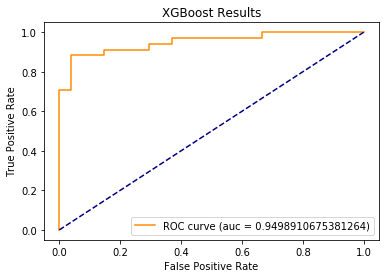

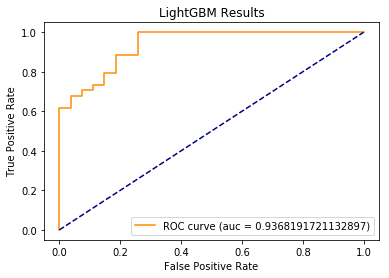

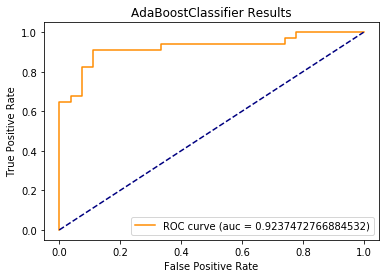

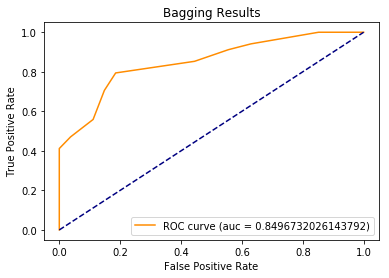

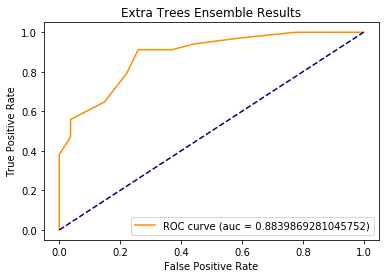

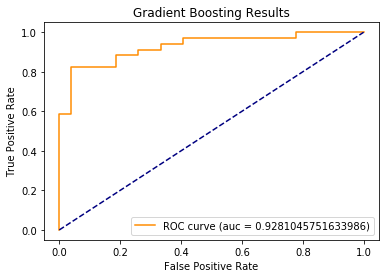

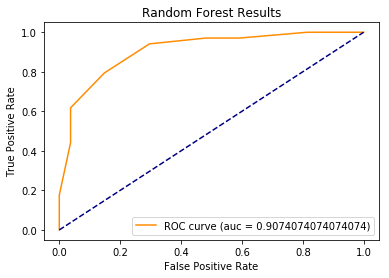

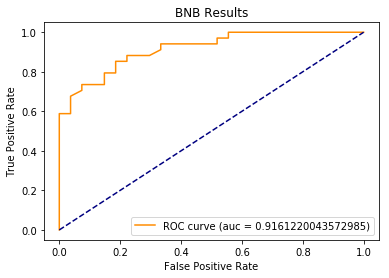

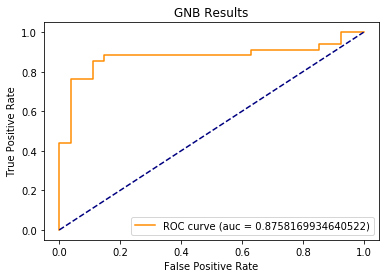

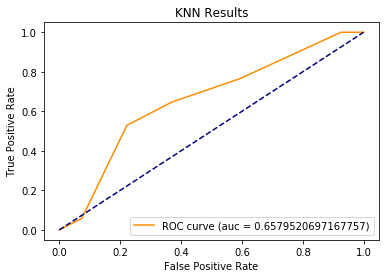

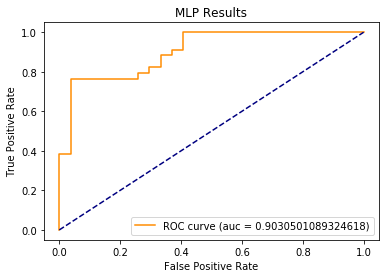

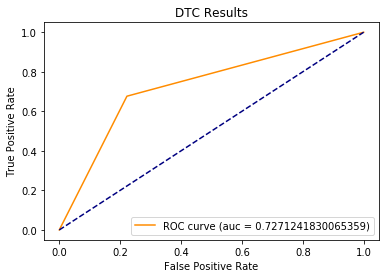

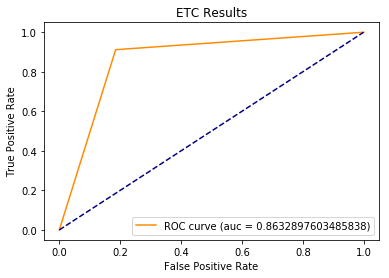

Best model is XGBoost


In [274]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
%matplotlib inline

best_model = None
best_model_name = ""
best_valid = 0

for name, model in models:
    model.fit(xtr,ytr)
    proba = model.predict_proba(xtst)[:,1]
    score = roc_auc_score(ytst, proba)
    fpr, tpr, _  = roc_curve(ytst, proba)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label=f"ROC curve (auc = {score})")
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.title(f"{name} Results")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()
    if score > best_valid:
        best_valid = score
        best_model = model
        best_model_name = name

print(f"Best model is {best_model_name}")

<h3>If you find it helpful, please upvote and encourage me. Stay tuned there is more to come.</h3>